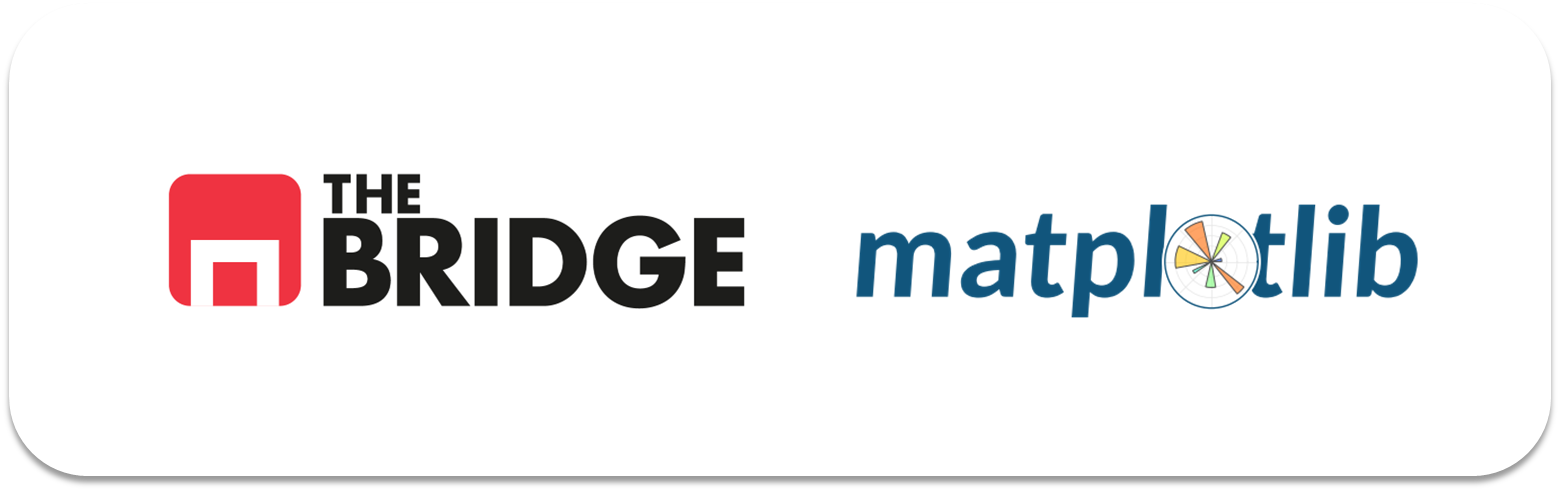

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [45]:
import matplotlib 
matplotlib.font_manager.findfont("Bradley Hand ITC")


'C:\\Windows\\Fonts\\BRADHITC.TTF'

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [46]:
df_california_cities = pd.read_csv("./data/california_cities.csv")
df_california_cities.dropna(axis=0, inplace=True)

### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

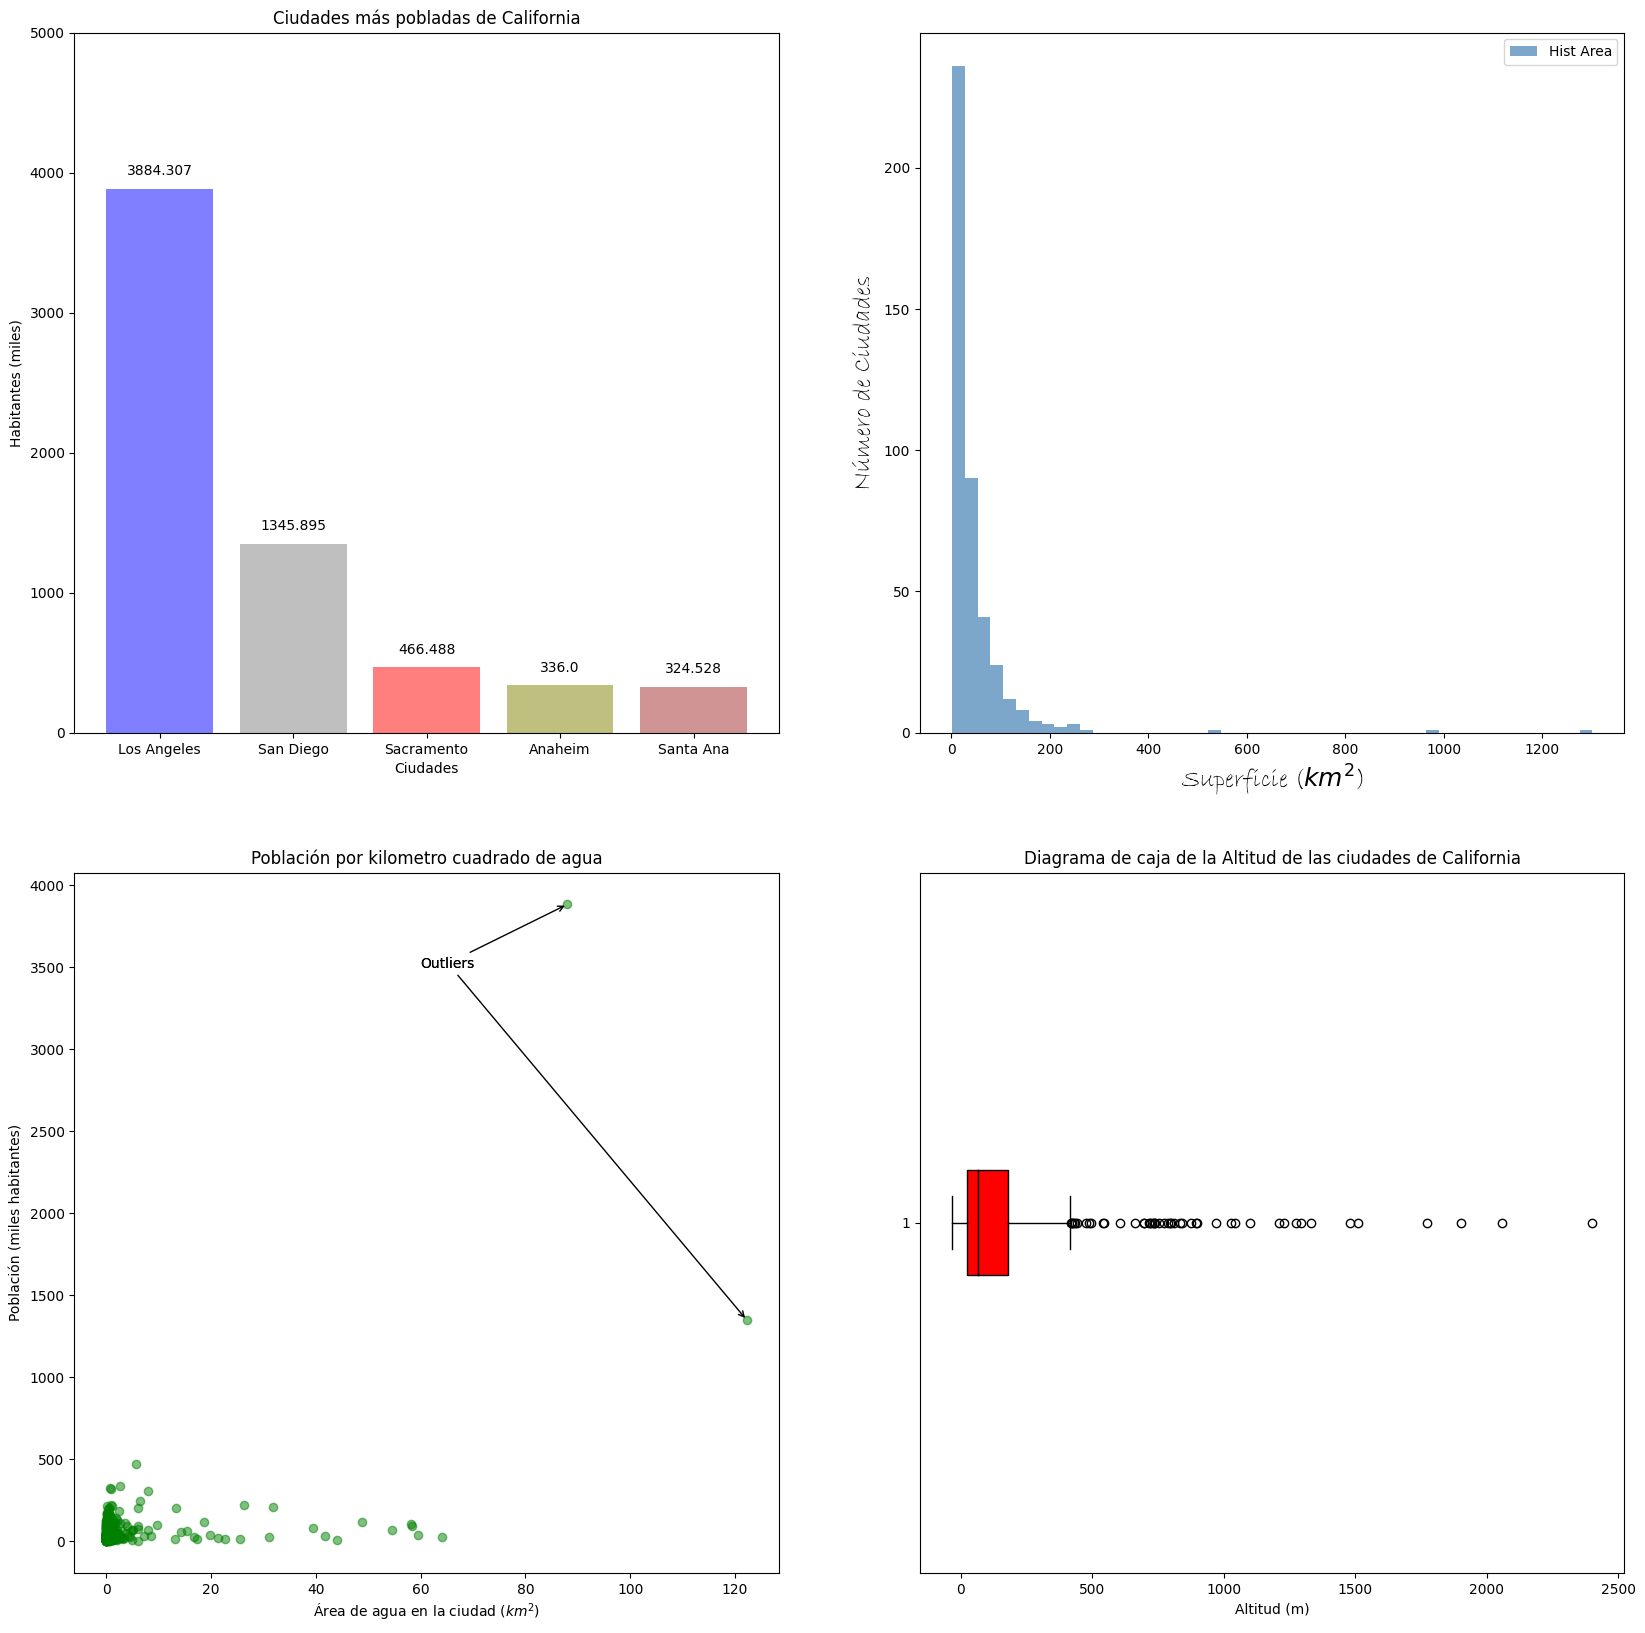

# Figura 1: Gráfico de barras de las ciudades más pobladas

In [47]:
top_5_ciudades = df_california_cities.loc[df_california_cities["population_total"].nlargest(5).index, ["city","population_total"]]
top_5_ciudades

,city,population_total
239,LosAngeles,3884307
367,SanDiego,1345895
359,Sacramento,466488
9,Anaheim,336000
386,SantaAna,324528


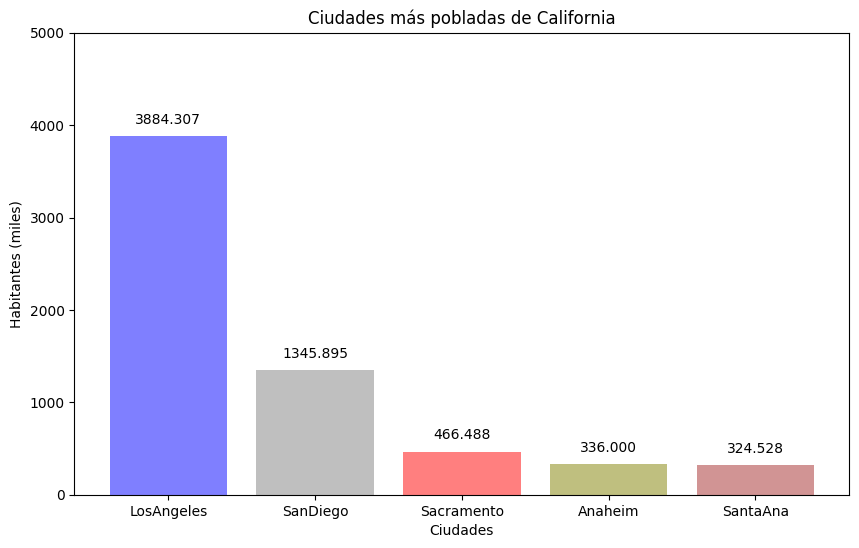

In [48]:
colores = ["blue","grey","red","olive","brown"]

plt.figure(figsize=(10,6))
barras = plt.bar(top_5_ciudades["city"], top_5_ciudades["population_total"] / 1000, color = colores, alpha= 0.5)

# Valores de las columnas en el gráfico.
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, yval + 100, f"{yval:.3f}", ha="center", va="bottom")

plt.ylim(0,5000)
plt.title("Ciudades más pobladas de California")
plt.xlabel("Ciudades")
plt.ylabel("Habitantes (miles)")

plt.show()

# Figura 2: Histograma de la superficie

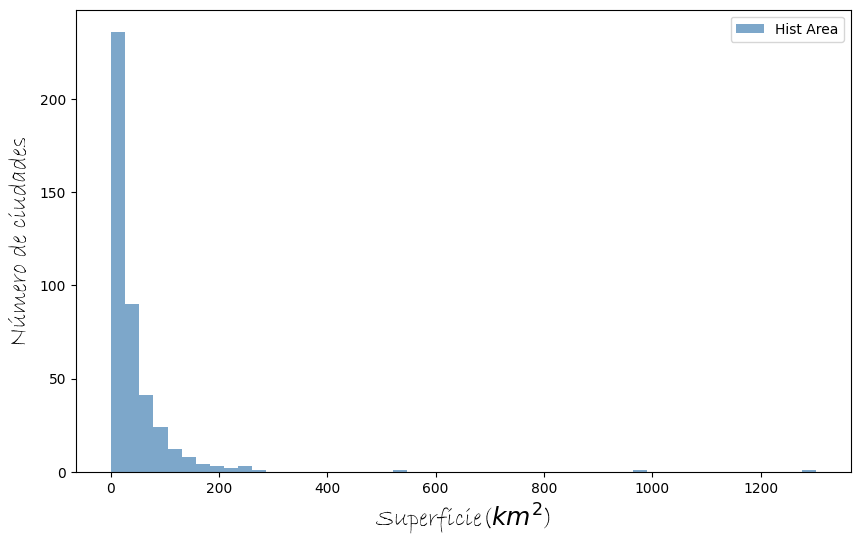

In [49]:
plt.figure(figsize=(10,6))
plt.hist(df_california_cities["area_total_km2"], bins=50, color="steelblue", label="Hist Area", alpha = 0.7)
plt.legend()
plt.ylabel("Número de ciudades", fontname = "Bradley Hand ITC", fontsize = 18)
plt.xlabel("Superficie($km^2$)", fontname = "Bradley Hand ITC", fontsize = 18)

plt.show()

# Figura 3: Diagrama de caja Altitud

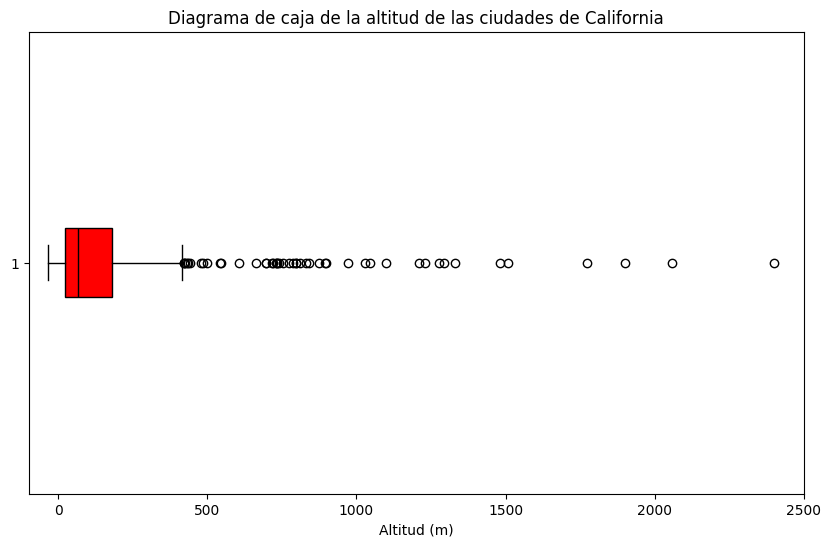

In [50]:
plt.figure(figsize=(10,6))
box = plt.boxplot(df_california_cities["elevation_m"], vert=False, patch_artist=True)
plt.xlim(-100,2500)
plt.xlabel("Altitud (m)")
plt.title("Diagrama de caja de la altitud de las ciudades de California")

# Cambiar el color de la caja
for patch in box["boxes"]:
    patch.set_facecolor("red")
    patch.set_ec("black")

#Cambiar el color de la mediana
for median in box["medians"]:
    median.set_color("black")

plt.show()

# Figura 4: Población por kilometro cuadrado de agua

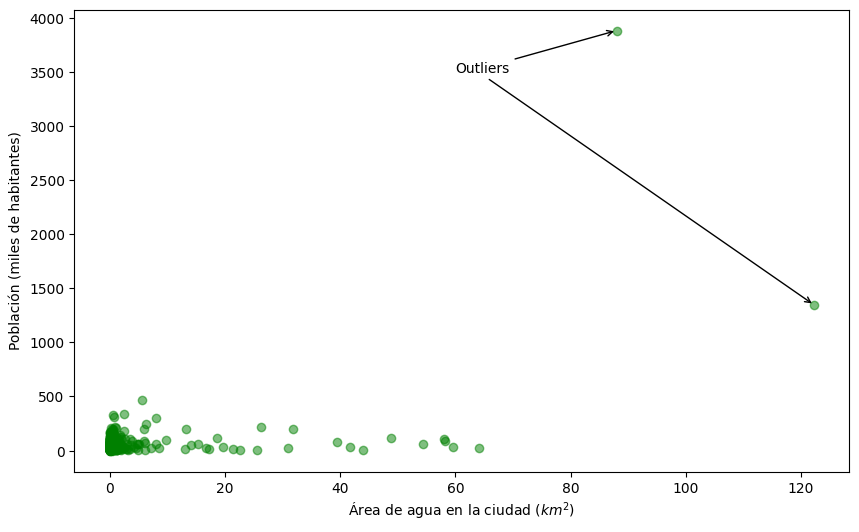

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(df_california_cities["area_water_km2"], df_california_cities["population_total"] / 1000, alpha=0.5, c = "green")
plt.xlabel("Área de agua en la ciudad $(km^2)$")
plt.ylabel("Población (miles de habitantes)")

# Flechas y valores outliers.
outlier_1_y = df_california_cities["population_total"].nlargest(2).iloc[0]
outlier_2_y = df_california_cities["population_total"].nlargest(2).iloc[1]
outlier_1_x = df_california_cities.loc[df_california_cities["population_total"].nlargest(2).index, "area_water_km2"].values[0]
outlier_2_x = df_california_cities.loc[df_california_cities["population_total"].nlargest(2).index, "area_water_km2"].values[1]

plt.annotate(xy = (outlier_1_x, outlier_1_y / 1000), xytext= (60,3500), text = ("Outliers"),
             arrowprops= dict(arrowstyle = "->"))
plt.annotate(xy = (outlier_2_x, outlier_2_y / 1000), xytext= (60,3500), text = ("        "),
             arrowprops= dict(arrowstyle = "->"))

plt.show()

# 4 gráficas 

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

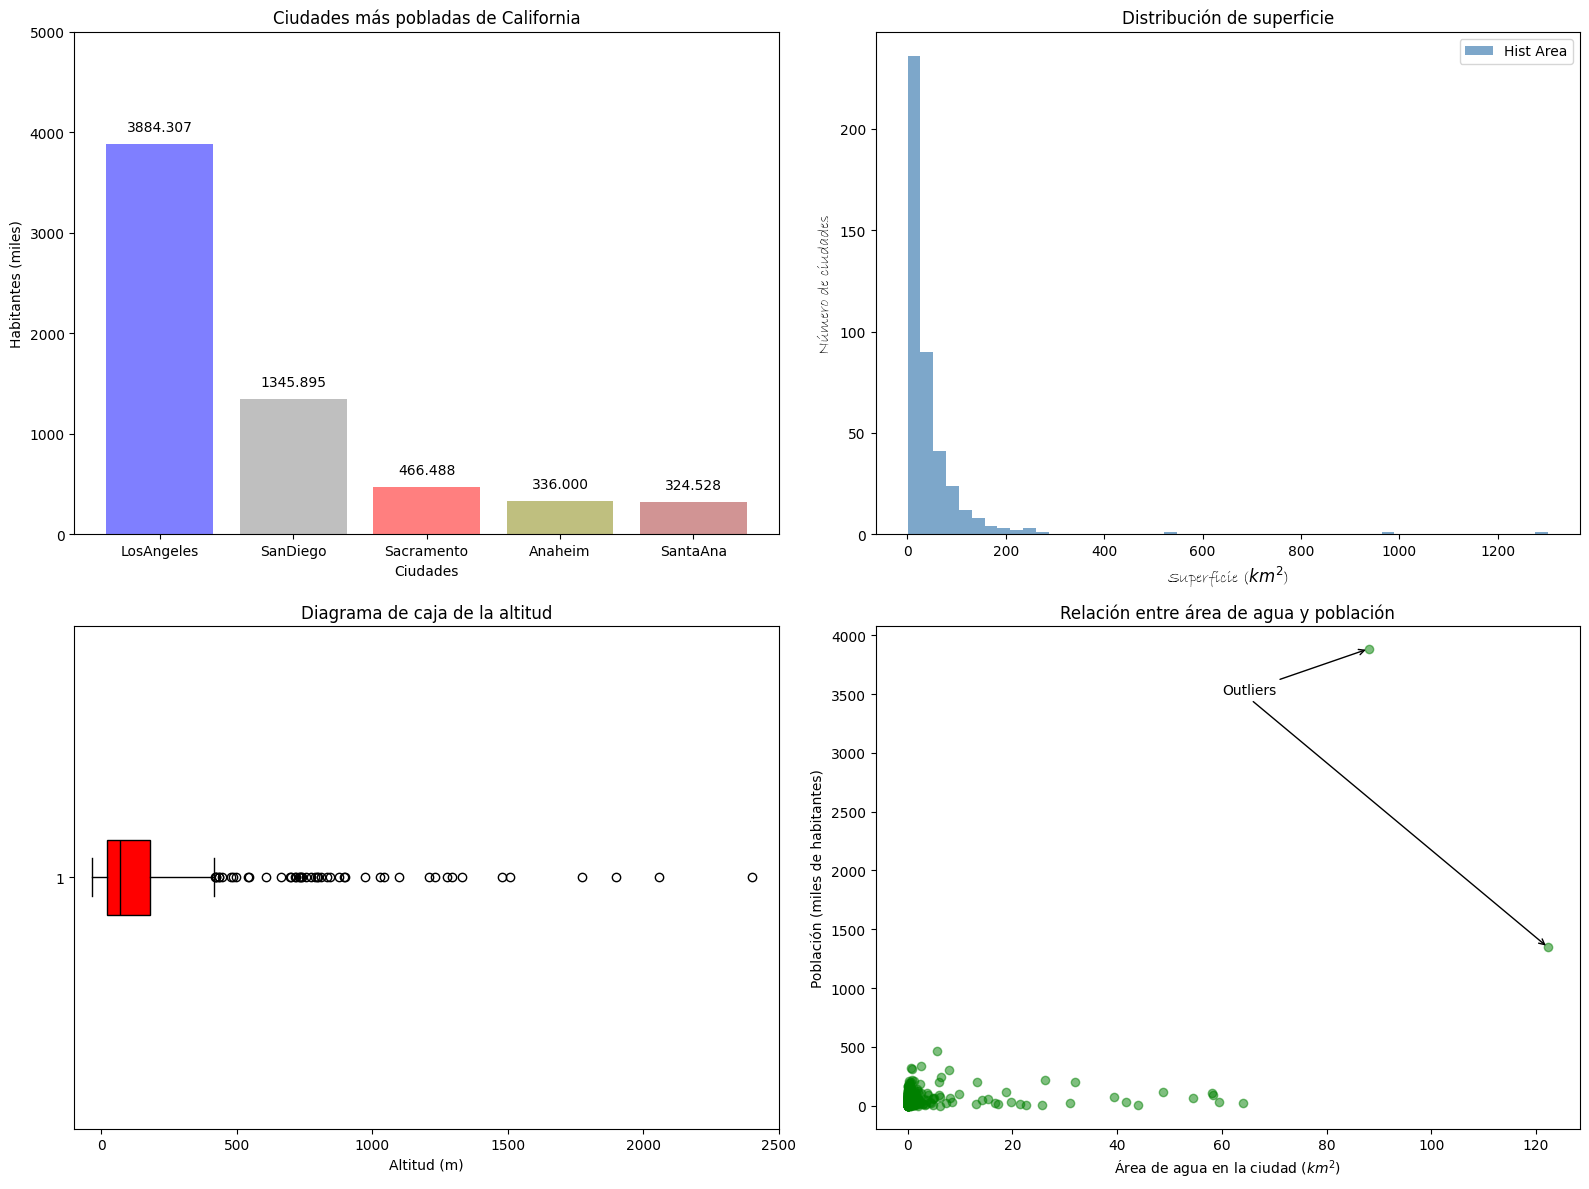

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Figura 1: Gráfico Ciudades más pobladas
top_5_ciudades = df_california_cities.loc[df_california_cities["population_total"].nlargest(5).index, ["city", "population_total"]]
colores = ["blue", "grey", "red", "olive", "brown"]
barras = axes[0, 0].bar(top_5_ciudades["city"], top_5_ciudades["population_total"] / 1000, color=colores, alpha=0.5)

# Añadir valores a las barras
for barra in barras:
    yval = barra.get_height()
    axes[0, 0].text(barra.get_x() + barra.get_width() / 2, yval + 100, f"{yval:.3f}", ha="center", va="bottom")

axes[0, 0].set_ylim(0, 5000)
axes[0, 0].set_title("Ciudades más pobladas de California")
axes[0, 0].set_xlabel("Ciudades")
axes[0, 0].set_ylabel("Habitantes (miles)")

# Figura 2: Histograma de la superficie en km^2
axes[0, 1].hist(df_california_cities["area_total_km2"], bins=50, color="steelblue", label="Hist Area", alpha=0.7)
axes[0, 1].legend()
axes[0, 1].set_ylabel("Número de ciudades", fontname="Bradley Hand ITC", fontsize=12)
axes[0, 1].set_xlabel("Superficie ($km^2$)", fontname="Bradley Hand ITC", fontsize=12)
axes[0, 1].set_title("Distribución de superficie")

# Figura 3: Diagrama de caja de la altitud
box = axes[1, 0].boxplot(df_california_cities["elevation_m"], vert=False, patch_artist=True)
axes[1, 0].set_xlim(-100, 2500)
axes[1, 0].set_xlabel("Altitud (m)")
axes[1, 0].set_title("Diagrama de caja de la altitud")

# Cambiar el color de la caja
for patch in box["boxes"]:
    patch.set_facecolor("red")
    patch.set_edgecolor("black")

# Cambiar el color de la mediana
for median in box["medians"]:
    median.set_color("black")

# Figura 4: Diagrama de dispersión de la superficie del agua en km^2
axes[1, 1].scatter(df_california_cities["area_water_km2"], df_california_cities["population_total"] / 1000, alpha=0.5, c="green")
axes[1, 1].set_xlabel("Área de agua en la ciudad ($km^2$)")
axes[1, 1].set_ylabel("Población (miles de habitantes)")
axes[1, 1].set_title("Relación entre área de agua y población")

# Coordenadas outliers
outlier_1_y = df_california_cities["population_total"].nlargest(2).iloc[0]
outlier_2_y = df_california_cities["population_total"].nlargest(2).iloc[1]
outlier_1_x = df_california_cities.loc[df_california_cities["population_total"].nlargest(2).index, "area_water_km2"].values[0]
outlier_2_x = df_california_cities.loc[df_california_cities["population_total"].nlargest(2).index, "area_water_km2"].values[1]

axes[1, 1].annotate(xy=(outlier_1_x, outlier_1_y / 1000), xytext=(60, 3500), text="Outliers",
                    arrowprops=dict(arrowstyle="->"))
axes[1, 1].annotate(xy=(outlier_2_x, outlier_2_y / 1000), xytext=(60, 3500), text="        ",
                    arrowprops=dict(arrowstyle="->"))

# Ajustar el espacio entre subgráficos
plt.tight_layout()

plt.show()